 import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
import tensorflow
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
tensorflow.test.is_gpu_available()

True

labels

In [5]:
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [6]:
labels = os.listdir("/kaggle/input/yawn-no-yawn")

In [7]:
labels

['yawn', 'no_yawn']

visualize random 1 image

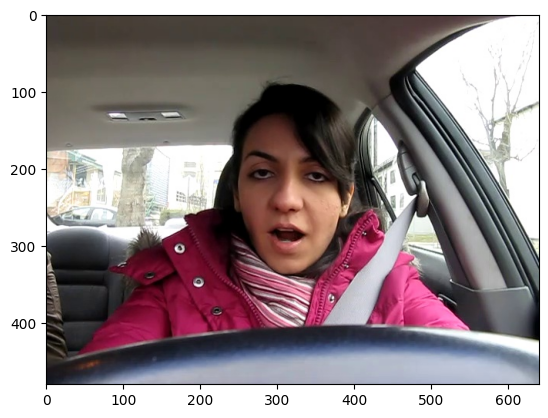

In [8]:

plt.imshow(plt.imread("/kaggle/input/yawn-no-yawn/yawn/10.jpg"))

image arrey

In [9]:
a = plt.imread("/kaggle/input/yawn-no-yawn/yawn/10.jpg")

image shape

In [10]:
a.shape

(480, 640, 3)

visualize yawn image

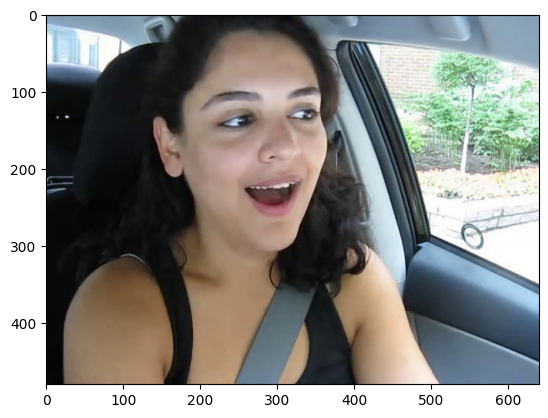

In [11]:
plt.imshow(plt.imread("/kaggle/input/yawn-no-yawn/yawn/50.jpg"))

In [29]:
#train_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.2)
train_data_gen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0, 1]
    height_shift_range=0.2, 
    validation_split= 0.2# Randomly shift images vertically
)

In [30]:
train_data = train_data_gen.flow_from_directory("/kaggle/input/yawn-no-yawn/", target_size=(80,80), batch_size=8, class_mode='categorical', subset='training')

Found 1159 images belonging to 2 classes.


In [31]:
validation_data = train_data_gen.flow_from_directory("/kaggle/input/yawn-no-yawn/", target_size=(80,80), batch_size=8, class_mode='categorical', subset= 'validation')

Found 289 images belonging to 2 classes.


In [32]:
test_data_gen = ImageDataGenerator(rescale=1./255)

reshape the array

LabelBinarizer

In [33]:
test_data = test_data_gen.flow_from_directory(("/kaggle/input/yawn-no-yawn/"),
                                target_size=(80,80),batch_size=8,class_mode='categorical')

Found 1448 images belonging to 2 classes.


label array

In [34]:
train_data

train test split

In [35]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

length of X_test

In [36]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu",input_shape=(80,80,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

import some libraries

In [37]:
model.build(input_shape=(80, 80, 3))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 78, 78, 256)       7168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 39, 39, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 128)       295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 64)        

In [39]:
validation_steps = len(test_data)
validation_steps

181

In [40]:
hist = model.fit(train_data, epochs=50, validation_data = test_data, shuffle=True, validation_steps = len(test_data))

Epoch 1/50
145/145 [==============================] - 14s 79ms/step - loss: 0.6747 - accuracy: 0.5669 - val_loss: 0.6177 - val_accuracy: 0.6098
Epoch 2/50
145/145 [==============================] - 11s 78ms/step - loss: 0.6073 - accuracy: 0.6497 - val_loss: 0.6089 - val_accuracy: 0.6644
Epoch 3/50
145/145 [==============================] - 12s 80ms/step - loss: 0.5794 - accuracy: 0.6773 - val_loss: 0.5330 - val_accuracy: 0.7445
Epoch 4/50
145/145 [==============================] - 11s 75ms/step - loss: 0.5387 - accuracy: 0.7118 - val_loss: 0.4686 - val_accuracy: 0.7693
Epoch 5/50
145/145 [==============================] - 11s 76ms/step - loss: 0.4313 - accuracy: 0.8128 - val_loss: 0.3209 - val_accuracy: 0.8826
Epoch 6/50
145/145 [==============================] - 12s 81ms/step - loss: 0.2897 - accuracy: 0.8904 - val_loss: 0.3044 - val_accuracy: 0.8826
Epoch 7/50
145/145 [==============================] - 11s 76ms/step - loss: 0.2230 - accuracy: 0.9146 - val_loss: 0.2036 - val_accuracy:

Data Augmentation

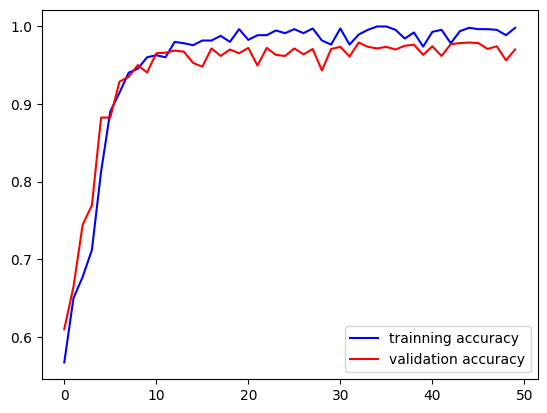

In [42]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

Model

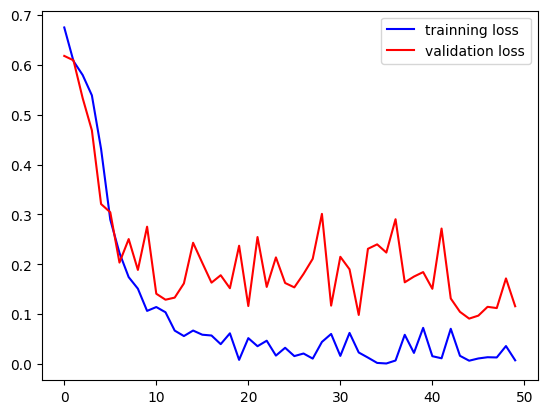

In [43]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [44]:
ModelLoss, ModelAccuracy = model.evaluate(test_data)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))

181/181 [==============================] - 5s 27ms/step - loss: 0.1161 - accuracy: 0.9703
Test Loss is 0.11611860245466232
Test Accuracy is 0.9703038930892944


In [45]:
ModelLoss, ModelAccuracy = model.evaluate(train_data)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))

145/145 [==============================] - 6s 43ms/step - loss: 4.3358e-04 - accuracy: 1.0000
Test Loss is 0.000433581619290635
Test Accuracy is 1.0


In [46]:
model.save("drowiness.h5")

In [47]:
model.save("drowiness.model")

In [ ]:
#pip install pillow

In [48]:
from keras.models import load_model
import cv2
from PIL import Image
from keras.preprocessing import image
import numpy as np

In [49]:
model = load_model('drowiness.h5')

In [59]:
labels_new = ["no_yawn", "yawn"]
IMG_SIZE = 80
def prepare(filepath, face_cas="../input/prediction-images/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 78, 78, 256)       7168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 39, 39, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 128)       295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 64)        

In [61]:
prediction = model.predict(test_data)

181/181 [==============================] - 5s 26ms/step


In [62]:
prediction = model.predict([prepare("/kaggle/input/yawn-no-yawn/no_yawn/1010.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 20ms/step


0

In [63]:
prediction = model.predict([prepare("/kaggle/input/yawn-no-yawn/yawn/125.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 19ms/step


1

In [64]:
prediction = model.predict([prepare("/kaggle/input/yawn-no-yawn/no_yawn/1003.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 36ms/step


0

In [65]:
prediction = model.predict([prepare("/kaggle/input/yawn-no-yawn/no_yawn/1038.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 20ms/step


0

In [67]:
prediction = model.predict([prepare("/kaggle/input/nbmnbmnbm/download-1.jpeg")])
np.argmax(prediction)


1/1 [==============================] - 0s 22ms/step


0

In [71]:
prediction = model.predict([prepare("/kaggle/input/mmmnmnmnmnmnmmn/images.jpeg")])
np.argmax(prediction)



1/1 [==============================] - 0s 48ms/step


1

In [72]:
prediction = model.predict([prepare("/kaggle/input/qqqqqqqqqqqqqqqqqqq/download.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 20ms/step


0